In [2]:
import numpy as np
import matplotlib.pyplot as plt

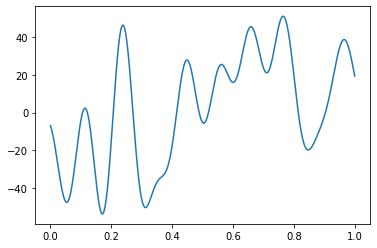

In [103]:
N = 5000 # size of output vector
x = np.linspace(0,1,N) # x-values to plot
rand = lambda : np.random.randint(0,100) # random number function

smooth = 5 # smoothness
## 1 is very spiky, 5 is average, 20 is very smooth ##

f = 0 # initialize vector
r = np.random.randint(10,100) # set random number of curves
for n in range(0,r):
    f = f + (5*rand())/r * np.cos( (rand()/smooth) * np.pi * x + rand())
    ## make sure amplitude, frequency and phase vary ##

#f += 0.5 # make sure function is positive (because of OCD)
#plt.axis([0, 1,min(f)-0.2,max(f)+0.2]) # set axes
plt.plot(x,f) # plot
#print(f)

In [45]:
def total_prob(psi, delta):
    prob = 0 # integration of (psi_squared dx)
    for i in range(N-2):
        prob += ((psi[i] + psi[i+1]) / 2.0) ** 2 * delta
        #prob += (psi[i] + psi[i+1])
    return prob

#def integrate(E, x_low, x_high, delta, V, plot=True):
def integrate(E, x_low, x_high, delta, V, plot=True):
  #def f(x):
   # return 2.0 * (V(x) - E)
    y = []
    for i in range(N):
        yi = 2.0 * (V[i] - E)
        y.append(yi)
    
    delta_sq = delta ** 2
    #N = int((x_high - x_low) / delta)

    #psi_left = 0.0
    # psi_right = 0.0
    #psi_first = 1.0

    #psi = [None for _ in range(N)]
    #psi[0] = psi_left
    #psi[1] = psi_first
    psi = []
    psi.append(0.0)
    psi.append(0.0001)

    for i in range(2, N-1):
       # x_next = i * delta
        #x = x_next - delta
        #x_prev = x - delta
        x = i
        x_next = i + 1
        x_prev = i - 1

        denominator = 1.0 - delta_sq * y[x_next]
        c1 = (2.0 - delta_sq * y[x]) / denominator
        c2 = (1.0 - delta_sq * y[x_prev]) / denominator

        #psi[i] = c1 * psi[i-1] - c2 * psi[i - 2]
        psi_new = c1 * psi[i -1] - c2 * psi[i - 2]
        psi.append(psi_new)
        
    
  # normalize psi
    norm_constant = total_prob(psi, delta) ** 0.5
    for i in range(N-1):
        psi[i] /= norm_constant

    #if plot:
     #   plt.clf()
      #  plt.plot([x_low + i * delta for i in range(N -1)], psi)
       # plt.grid()
        #plt.show()

    return psi

5000 5000


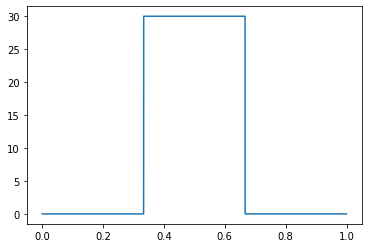

In [97]:
def f1(x):
    '''
    #Potential function in the finite square well.
    '''
    y=[]
    for i in range(N):
        if 1/3 <= x[i] <=2/3:
            val = 30
        elif x[i]<0:
            val=500
        elif x[i]>1:
            val=500
        else:
            val = 0
        y.append(val)
    return y
plt.plot(x,f1(x))
print(len(f1(x)),N)

In [105]:
potential = {
    "x_low": 0.0,
    "x_high": 1.0,
    "delta": 1/N,
    "V": f1(x)
}

potential1 = {
    "x_low": 0.0,
    "x_high": 1.0,
    "delta": 1/N,
    "V": f
}

#integrate(E = 1, **infinite_well)[1000]
#integrate(E = 7, **potential)

In [26]:
def find_energy(potential):
    def find_energy_high(potential):
        for i in range(3000):
            if integrate(E = i/10, **potential)[N - 2] > 0:
                return i/10
    def find_energy_low(potential):
        for i in range(3000):
            if integrate(E = i/10, **potential)[N - 2] < 0:
                return i/10

    E_high0 = find_energy_high(potential)
    E_low0 = find_energy_low(potential)
    print(E_high0)
    print(E_low0)
    if E_high0 > E_low0:
        E_high=E_high0
        for i in range(300):
            if integrate(E = E_high0-i/10, **potential)[N-2] < 0:
                E_low = E_high0-i/10
                return E_high, E_low
    if E_low0 > E_high0:
        E_low=E_low0
        for i in range(300):
            if integrate(E = E_low0-i/10, **potential)[N-2] > 0:
                E_high = E_low0-i/10
                return E_high, E_low

In [25]:
def deviation(psi_computed, psi_actual):
    return psi_computed - psi_actual

def find_energy_eigenstate(E_low, E_high, integration_params):
    psi_right = 0.0

    psi_low = integrate(E_low, **integration_params, plot=False)
    psi_high = integrate(E_high, **integration_params, plot=False)
    dev_low = deviation(psi_low[-1], psi_right)
    dev_high = deviation(psi_high[-1], psi_right)

    def helper(low, high, d_low, d_high):
        E_mid = (low + high) / 2.0
        psi_mid = integrate(E_mid, **integration_params, plot=False)
        if (high - low) < 1e-8:
            return E_mid, [psi_mid]

        d_mid = deviation(psi_mid[-1], psi_right)
        if (d_low * d_mid) < 0.0:
            E_approx, psis = helper(low, E_mid, d_low, d_mid)
        else:
            E_approx, psis = helper(E_mid, high, d_mid, d_high)

        psis = [psi_mid] + psis
        return E_approx, psis

    E_approx, psis = helper(E_low, E_high, dev_low, dev_high)
    psis = [psi_low, psi_high] + psis
    print("num iterations =", len(psis))

    xs = [integration_params["x_low"] + i * integration_params["delta"] for i in range(len(psis[-1]))]
    for i in range(len(psis)):
        plt.plot(xs, psis[i])
        plt.grid()
    plt.show()

    plt.plot(xs, psis[-1])
    plt.grid()
    plt.show()

    return E_approx, psis[-1]

0.0
18.8
(18.7, 18.8)
0.0
18.8
0.0
18.8
num iterations = 3


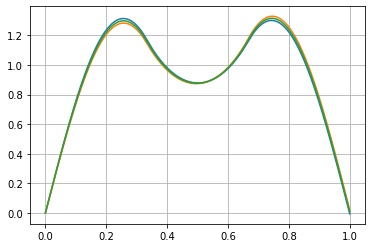

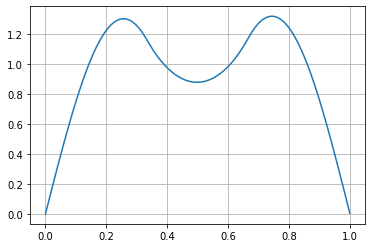

30.3
0.0
30.3
0.0
num iterations = 27


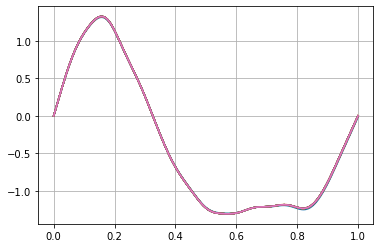

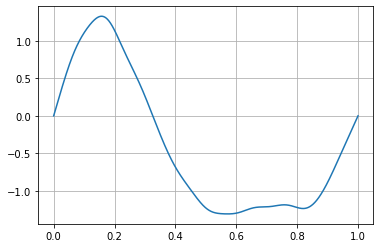

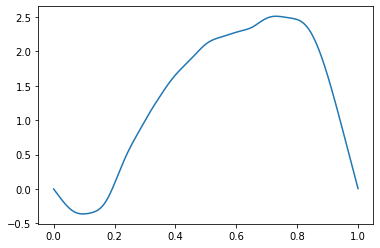

In [106]:
print(find_energy(potential))
E_approx, psi = find_energy_eigenstate(find_energy(potential)[1], find_energy(potential)[0], integration_params=potential)
E_approx, psi1 = find_energy_eigenstate(find_energy(potential1)[1], find_energy(potential1)[0], integration_params=potential1)

In [ ]:
psif=[]
for i in range(N-1):
    psif.append(psi[i]-psi1[i])
plt.plot(np.linspace(0,1,N-1),psif)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

In [ ]:
psi = []
psi.append(0.0)
psi.append(0.1)
for i in range(2, N-1):
   # x_next = i * delta
    #x = x_next - delta
    #x_prev = x - delta
    x = i
    x_next = i + 1
    x_prev = i - 1

    denominator = 1.0 - delta_sq * f[x_next]
    c1 = (2.0 - delta_sq * f[x]) / denominator
    c2 = (1.0 - delta_sq * f[x_prev]) / denominator

    #psi[i] = c1 * psi[i-1] - c2 * psi[i - 2]
    psi_new = c1 * psi[i-1] - c2 * psi[i - 2]
    psi.append(psi_new)

print(len(psi))

In [ ]:
infinite_well = {
    "x_low": -1.0,
    "x_high": 1.0,
    "delta": 0.002,
    "V": lambda x: 0.0
    #"V": f
}

In [ ]:
for i in range(2, 3):
       # x_next = i * delta
        #x = x_next - delta
        #x_prev = x - delta
        delta_sq = (1/N)**2
        x = i
        x_next = i + 1
        x_prev = i - 1
        denominator = 1.0 - delta_sq * f[x_next]
        c1 = (2.0 - delta_sq * f[x]) / denominator
        c2 = (1.0 - delta_sq * f[x_prev]) / denominator

        psi[i] = c1 * psi[i-1] - c2 * psi[i - 2]
        psi[i] = c1 * psi[i-1] - c2 * psi[i - 2]
        print(c1,c2)

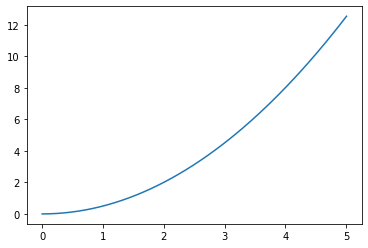

In [8]:
N = 128
x = np.linspace(0,5+1/N,N)
f = x ** 2 / 2
plt.plot(x,f)

In [ ]:
def find_energy_high(potential):
        for i in range(300):
            if integrate(E = 3+i/10, **potential)[N - 2] > 0:
                return i/10
def find_energy_low(potential):
    for i in range(300):
        if integrate(E =  3+i/10, **potential)[N - 2] < 0:
            return i/10
f = [0]*128
E_high0 = find_energy_high(potential)
E_low0 = find_energy_low(potential)
print(E_high0, E_low0)
      
if E_high0 > E_low0:
    E_high=E_high0
    for i in range(300):
        if integrate(E = E_high0-i/10, **potential)[N-2] < 0:
            E_low = E_high0-i/10
    print(E_high, E_low) 
if E_low0 > E_high0:
    E_low=E_low0
    for i in range(300):
        if integrate(E = E_low0-i/10, **potential)[N-2] > 0:
            E_high = E_low0-i/10
    print(E_high, E_low) 